<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_5_machine_learning_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 | Machine Learning Basics

References:
1. Wolpert, D. H., & Macready, W. G. (1997). No free lunch theorems for optimization. IEEE transactions on evolutionary computation, 1(1), 67-82.

# Learning Algorithms

- Classification
- Classification with missing inputs
- Regression
- Transcription
- Machine translation
- Structured output
- Anomaly detection
- Synthesis and sampling
- Imputation of missing values
- Denoising
- Density estimation or probability mass function estimation

# Supervised and Unsupervised Learning

**Unsupervised learning algorithms** experience a dataset containing many features, then learn useful properties of the structure of this dataset. In the context of deep learning, we usually want to learn the entire probability distribution that generated a dataset, whether explicitly, as in density estimation, or implicitly for tasks such as synthesis or denosing.

**Supervised learning algorithms** experience a dataset containing features, but each example is also associated with a label or target. For example, the Iris dataset is annotated with species of each iris plant.

# Linear Regression

Linear regression solves the regression problem. In other words, the goal is to build a system that can take a vector $x \in \mathbb{R}^n$ as input and predict the value of a scalar $y \in \mathbb{R}$ The output of linear regression is a linear function of the input. Let $\hat{y}$ be the value that our model predicts y should take on. We define the output to be

$$
  \hat{y} = w^Tx
$$

where $w \in \mathbb{R}$ is a vector of parameters

## Mean Squared Error

We need a performance measure to evaluate the model.

$$
  MSE_{test} = \frac{1}{m} \sum_i (\hat{y}^{(test)} - y^{(test)})^2_i \\
$$

Intiutively, one can see the error measure decreases to $0$ when $\hat{y}^{(test)} = y^{(test)}$

We can also see that:

$$
  MSE_{test} = \frac{1}{m} || \hat{y}^{(test)} - y^{(test)} ||^2_2
$$

so the error increases whenevery the Euclidean distance between the predictions and the targets increase.

To minimize $MSE_{train}$ we can simply solve for where its gradient is 0:

$$
  \nabla_w MSE_{train} = 0 \\
  \nabla_w \frac{1}{m} || \hat{y}^{(train)} - y^{(train)} ||^2_2 = 0 \\
  \frac{1}{m} \nabla_w || X^{(train)}w - y^{(train)}||^2_2 = 0  \\
  \nabla_w (X^{(train)}w - y^{(train)})^T(X^{(train)}w - y^{(train)}) = 0 \\
  \nabla_w (w^T X^{(train)T} X^{(train)}w - 2w^TX^{(train)T}y^{(train)} + y^{(train)T}y^{(train)}) = 0  \\
  2 X^{(train)T}X^{(train)}w - 2X^{(train)T}y^{(train)} = 0 \\
  w = (X^{(train)T}X^{(train)})^{-1} X^{(train)T}y^{(train)}
$$

The system of equations whose solutions are given on the final line are known as the **normal equations**.

It is worth noting that the term **linear regression** is often used to refer to a slightly more sophisticated model with one additional parameter - an intercept term b

$$
  \hat{y} = w^Tx + b
$$

So mapping from parameters to predictions is still a linear function but the mapping from features to predictions is now an affine function. This extension to affine functions means the plot of the model's predictions still looks like a line, but it need not pass through the origin.

The intercept term $b$ is often called the bias parameter of the affine transformation. The terminology derives from the point of view that the output of the transformation is biased towards being $b$ in the absence of any input.


Final parameters: w = 1.9540, b = 1.0215


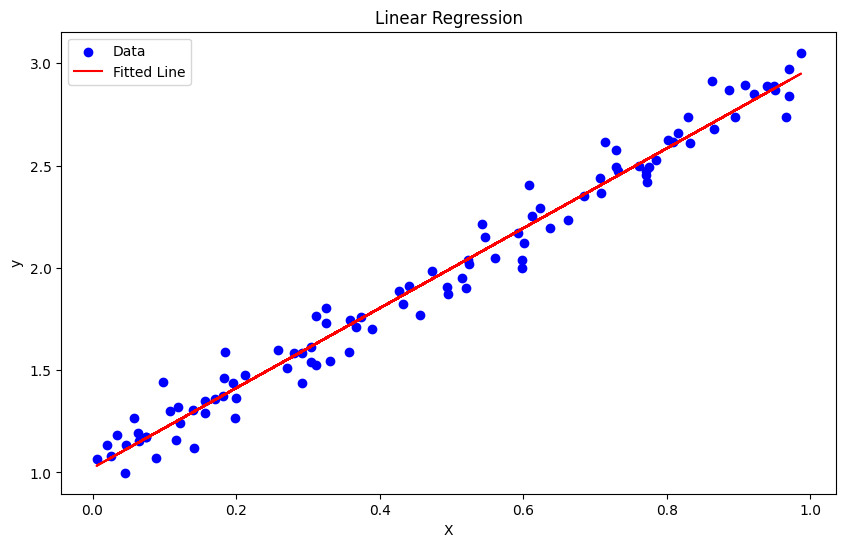

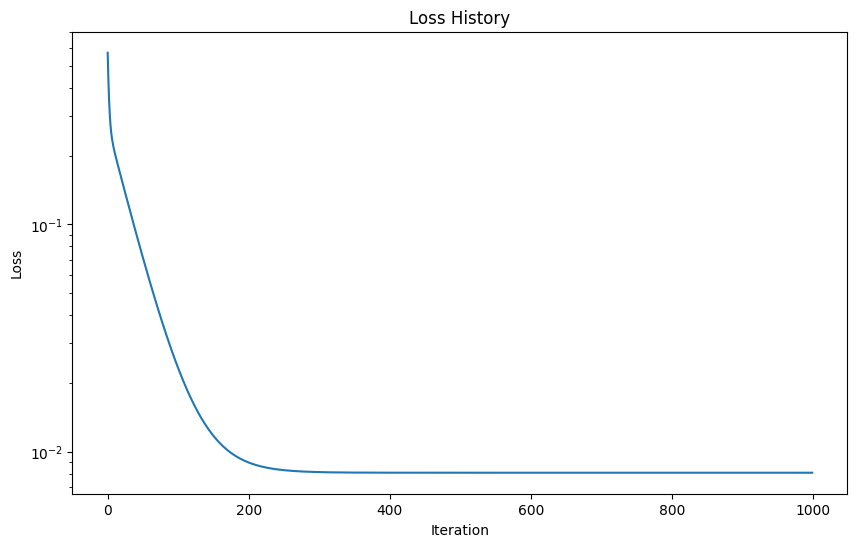

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn(1)

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Lists to store the loss history
loss_history = []

# Gradient descent
for i in range(num_iterations):
    # Forward pass
    y_pred = np.dot(X, w) + b

    # Compute loss
    loss = np.mean((y_pred - y) ** 2)
    loss_history.append(loss)

    # Compute gradients
    dw = (2/len(y)) * np.dot(X.T, (y - y_pred))
    db = (2/len(y)) * np.sum(y - y_pred)

    # Update parameters
    w += learning_rate * dw
    b += learning_rate * db

# Print final parameters
print(f"Final parameters: w = {w[0][0]:.4f}, b = {b[0]:.4f}")

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, np.dot(X, w) + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.yscale('log')
plt.show()

# Capacity, Overfitting and Underfitting

The central challenge in machine learning is that our algorithm must perform well on new, previously unseen inputs - not just those on which our model was trained. The ability to perform well on previously unobserved inputs is called generalization.

What seperates machine learning from optomization is that we want the **generalization error** also called the **test error**, to be low was well. The generalization error is defined as the expected value of the error on a new input.

In our linear regression example, we trained the model

$$
\frac{1}{m^{(train)}} || X ^{(train)}w - y^{(train)} ||^2_2
$$

But we actually care about the test error

$$
  \frac{1}{m^{(test)}} || X^{(test)}w - y^{(test)} ||^2_2
$$

**Underfitting** occurs when the model is not able to obtain a sufficiently low error value on the training set.

**Overfitting** occurs when the gap between training error and test error is too large.

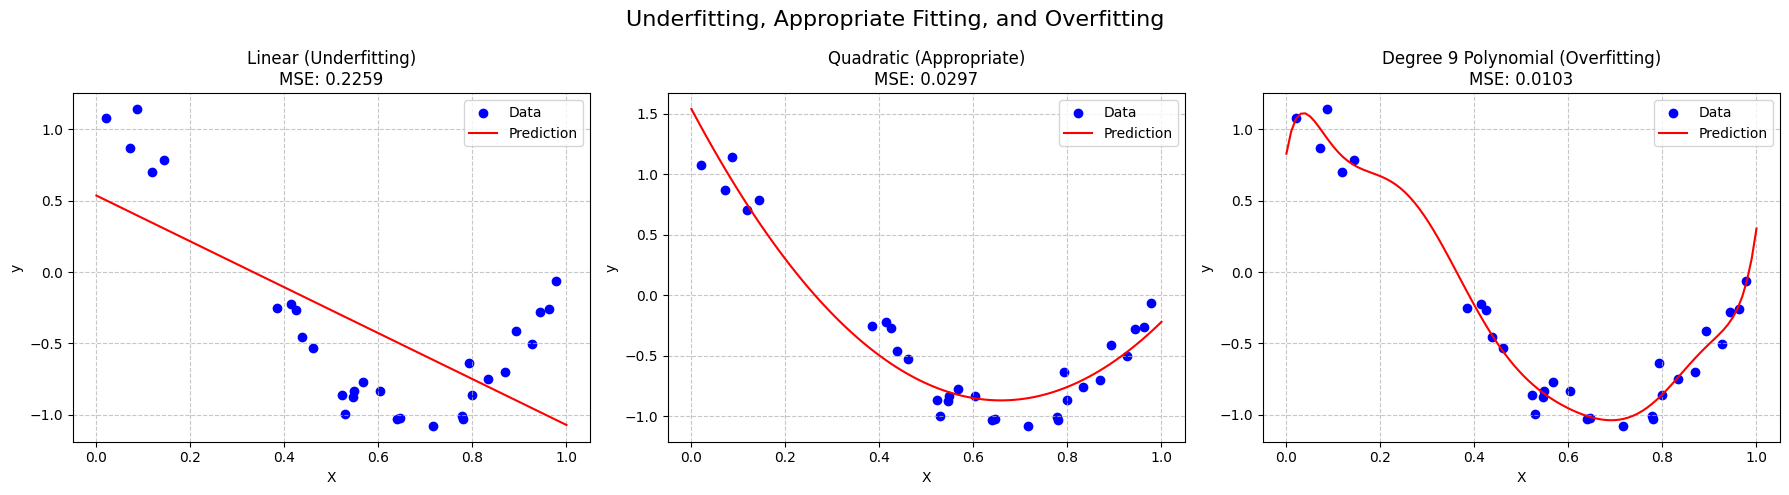

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.uniform(0, 1, 30))
y = np.cos(1.5 * np.pi * X) + np.random.normal(0, 0.1, 30)

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Create models
models = [
    ("Linear (Underfitting)", LinearRegression()),
    ("Quadratic (Appropriate)", LinearRegression()),
    ("Degree 9 Polynomial (Overfitting)", LinearRegression())
]

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Underfitting, Appropriate Fitting, and Overfitting", fontsize=16)

# Colors for actual data and predictions
data_color = 'blue'
pred_color = 'red'

for i, (title, model) in enumerate(models):
    ax = axs[i]

    # Prepare features
    if i == 0:  # Linear
        X_poly = X
    elif i == 1:  # Quadratic
        X_poly = PolynomialFeatures(degree=2).fit_transform(X)
    else:  # Degree 9 Polynomial
        X_poly = PolynomialFeatures(degree=9).fit_transform(X)

    # Fit the model
    model.fit(X_poly, y)

    # Make predictions
    X_test = np.linspace(0, 1, 100).reshape(-1, 1)
    if i == 0:
        X_test_poly = X_test
    elif i == 1:
        X_test_poly = PolynomialFeatures(degree=2).fit_transform(X_test)
    else:
        X_test_poly = PolynomialFeatures(degree=9).fit_transform(X_test)

    y_pred = model.predict(X_test_poly)

    # Calculate MSE
    mse = mean_squared_error(y, model.predict(X_poly))

    # Plot
    ax.scatter(X, y, color=data_color, label='Data')
    ax.plot(X_test, y_pred, color=pred_color, label='Prediction')
    ax.set_title(f"{title}\nMSE: {mse:.4f}")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# K-Nearest Neighbour

K-nearest neigbour is a non-parametric model, whose complexity is a function of the training size. Unlike linear regression the nearest neighbour model simply stores $X$ and $y$ from the training set. When asked to classify a point $x$, the model looks up the nearest entry in the training set and returns the associated regression target.

In other words $\hat{y} = y_i$ where $i = arg min ||X_i -x ||^2_2$

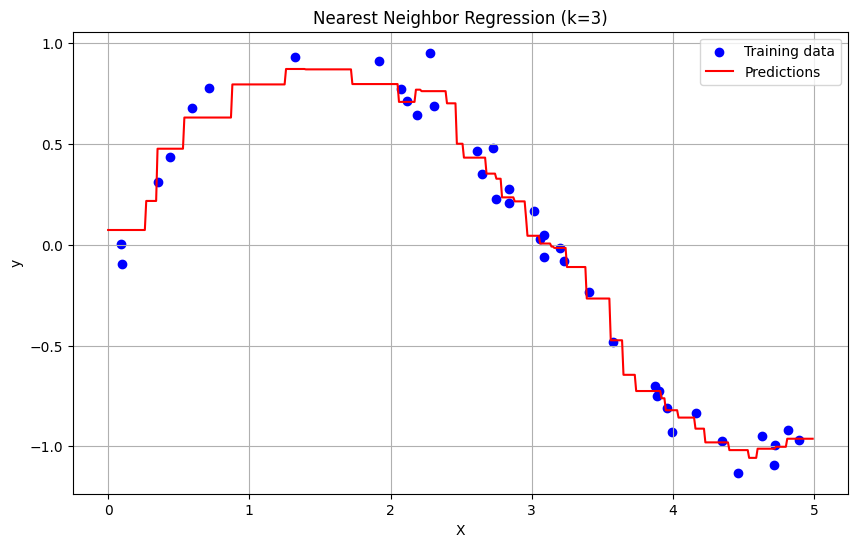

Sample predictions:
X: 0.00, Predicted y: 0.07
X: 1.00, Predicted y: 0.80
X: 2.00, Predicted y: 0.80
X: 3.00, Predicted y: 0.04
X: 4.00, Predicted y: -0.82


In [3]:
import numpy as np
import matplotlib.pyplot as plt

class NearestNeighborRegressor:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            nearest_neighbor_ids = distances.argsort()[:self.k]
            nearest_neighbor_values = self.y_train[nearest_neighbor_ids]
            prediction = np.mean(nearest_neighbor_values)
            predictions.append(prediction)
        return np.array(predictions)

# Generate sample data
np.random.seed(0)
X_train = np.sort(5 * np.random.rand(40, 1), axis=0)
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.1, X_train.shape[0])

# Create and train the model
model = NearestNeighborRegressor(k=3)
model.fit(X_train, y_train)

# Generate points for prediction
X_test = np.arange(0, 5, 0.01).reshape(-1, 1)

# Make predictions
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.title('Nearest Neighbor Regression (k=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print some sample predictions
print("Sample predictions:")
for i in range(0, len(X_test), 100):
    print(f"X: {X_test[i][0]:.2f}, Predicted y: {y_pred[i]:.2f}")

# Bayes Error

The ideal model is an oracle that simply knows the true probability distribution that generates the data. Even such a model will still incur some error on many problems, because there may still be noise in the distribution.

The error incurred by an oracle making predictions from the true distribution $p(x,y)$ is called **Bayes error**

# The No Free Lunch Theorem

The **no free lunch theorem** for machine learning (Wolpert 1997) states that, averaged over all possible data-generating distributions, every classification algorithm has the same error rate when classifying previously unobserved points. In other words in some sense, no machine learning algorithm is universally any better than any other. Themost sophisticated algorithm we can concieve of has the same average performance (over all possible tasks) as merely predicting that every point belongs to the same class.

# Regularization

**Regularization** is any modiciation we make to a learning algorithm that is not intended to reduce its generalization error but not its training error.


We modify the training criterion of linear regression to include **weight decay**. TO perform linear regression with weight decay, we mimimize a sum $J(w)$ comprising of both the mean squared error on the training and a criterion that expresses the perference for the weights to have smaller $L^2$ norm. Specifically

$$
  J(w) = MSE_{train} + \lambda w^T w
$$

where $\lambda$ is a value chosen ahead of time that controls the strength of our preference for smaller weights. When $\lambda = 0$, we impose no preference, and larger $\lambda$ forces the weights to become smaller.

Polynomial Regression (degree 10):

Lambda too large (λ=10):
Train MSE: 0.4791, Test MSE: 0.3602

Appropriate Lambda (λ=0.01):
Train MSE: 0.0920, Test MSE: 1.5206

No regularization (λ=0):
Train MSE: 0.1032, Test MSE: 8.6789


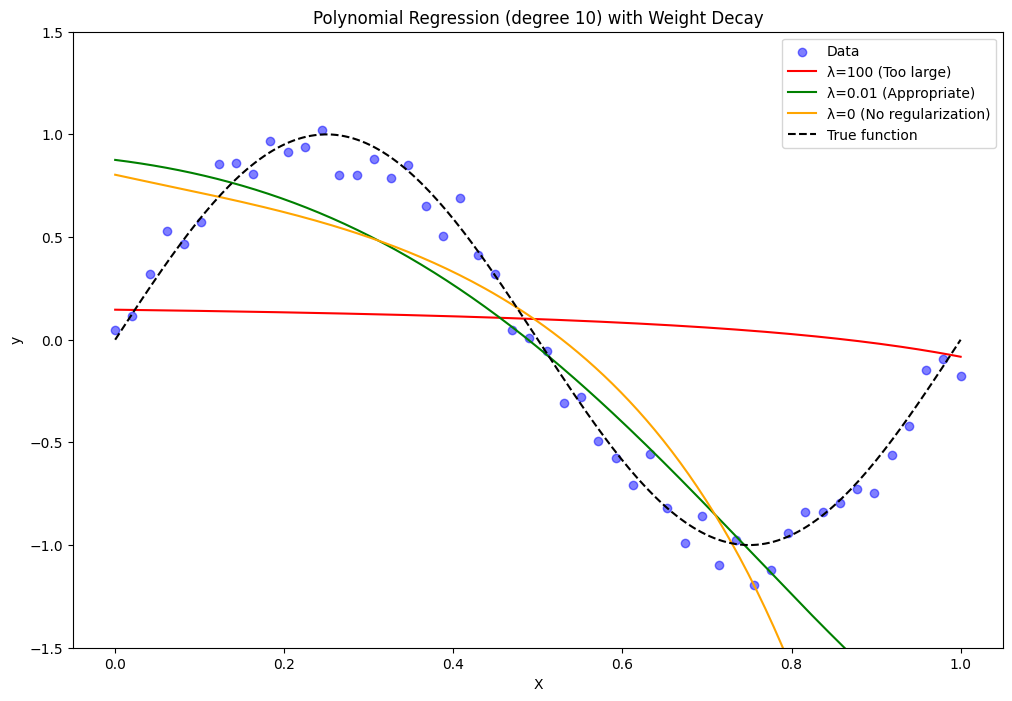

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 50).reshape(-1, 1)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, X.shape)

# Split data into train and test sets
X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]

def polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(1, degree+1)])

def polynomial_regression_weight_decay(X, y, degree, lambda_val, learning_rate=0.01, epochs=5000):
    X_poly = polynomial_features(X, degree)
    w = np.random.randn(X_poly.shape[1], 1)
    b = np.random.randn(1)

    for _ in range(epochs):
        y_pred = X_poly.dot(w) + b
        dw = (1/len(y)) * (X_poly.T.dot(y_pred - y) + lambda_val * w)
        db = (1/len(y)) * np.sum(y_pred - y)
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

def evaluate_model(X, y, w, b, degree):
    X_poly = polynomial_features(X, degree)
    y_pred = X_poly.dot(w) + b
    mse = np.mean((y - y_pred)**2)
    return mse

degree = 10  # Polynomial degree

# Example 1: Lambda too large
w_large, b_large = polynomial_regression_weight_decay(X_train, y_train, degree, lambda_val=100)
mse_large_train = evaluate_model(X_train, y_train, w_large, b_large, degree)
mse_large_test = evaluate_model(X_test, y_test, w_large, b_large, degree)

# Example 2: Appropriate Lambda
w_appropriate, b_appropriate = polynomial_regression_weight_decay(X_train, y_train, degree, lambda_val=0.01)
mse_appropriate_train = evaluate_model(X_train, y_train, w_appropriate, b_appropriate, degree)
mse_appropriate_test = evaluate_model(X_test, y_test, w_appropriate, b_appropriate, degree)

# Example 3: Lambda = 0 (No regularization)
w_zero, b_zero = polynomial_regression_weight_decay(X_train, y_train, degree, lambda_val=0)
mse_zero_train = evaluate_model(X_train, y_train, w_zero, b_zero, degree)
mse_zero_test = evaluate_model(X_test, y_test, w_zero, b_zero, degree)

# Print results
print(f"Polynomial Regression (degree {degree}):")
print("\nLambda too large (λ=10):")
print(f"Train MSE: {mse_large_train:.4f}, Test MSE: {mse_large_test:.4f}")

print("\nAppropriate Lambda (λ=0.01):")
print(f"Train MSE: {mse_appropriate_train:.4f}, Test MSE: {mse_appropriate_test:.4f}")

print("\nNo regularization (λ=0):")
print(f"Train MSE: {mse_zero_train:.4f}, Test MSE: {mse_zero_test:.4f}")

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')

X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
X_plot_poly = polynomial_features(X_plot, degree)

plt.plot(X_plot, X_plot_poly.dot(w_large) + b_large, color='red', label='λ=100 (Too large)')
plt.plot(X_plot, X_plot_poly.dot(w_appropriate) + b_appropriate, color='green', label='λ=0.01 (Appropriate)')
plt.plot(X_plot, X_plot_poly.dot(w_zero) + b_zero, color='orange', label='λ=0 (No regularization)')
plt.plot(X_plot, np.sin(2 * np.pi * X_plot), color='black', linestyle='--', label='True function')

plt.legend()
plt.title(f'Polynomial Regression (degree {degree}) with Weight Decay')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-1.5, 1.5)
plt.show()

# Hyperparameters and Validation Sets

Most machine learning algorithms have **hyperparameters**, settings that we can use to control the algorithms behaviour. The values of hyperparameters are not adpated by the learning algorithm itself (though we can desgin a nested learning procedure in which one learning algorithm learns the best hyperparameters for another learning algorithm).

The polynomial regresion example has a single hyperparmater: the degree of the polynomial, which acts as **capacity** hyperparameter. The $\lambda$ value used to control the strength of the weight decay is another example of a hyperparameter.

A **validation set** is a collection of training samples that te algorithm does not observe.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 0.5 * X[:, 3] - 2 * X[:, 4] + np.random.normal(0, 0.1, 1000)

# Step 1: Split the data into temporary train and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the temporary train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Data split sizes:")
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Step 3: Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"\nValidation MSE: {val_mse:.4f}")

# Step 6: Fine-tune hyperparameters (if necessary)
# For LinearRegression, there are no hyperparameters to tune.
# For other models, you would use the validation set to select the best hyperparameters.

# Step 7: Evaluate on test set
y_test_pred = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")

# Optional: Print model coefficients
print("\nModel Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i+1}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Data split sizes:
Train set: 600 samples
Validation set: 200 samples
Test set: 200 samples

Validation MSE: 0.0102
Test MSE: 0.0112

Model Coefficients:
Feature 1: 0.6001
Feature 2: 0.8877
Feature 3: -0.2832
Feature 4: 0.1401
Feature 5: -0.5800
Intercept: 1.2291


# Cross Validation

**Cross validation** involves repeating the training and testing computation on different randomly chosen subsets or splits of the original dataset. The most common of these is the **k-fold cross-validation**, in which a partition of the dataset is fromed by spliiting it into $k$ nonoverlapping subsets. The test error may then be estimated by taking the average test error across $k$ trials.

In [11]:
import numpy as np

def generate_sample_data(n_samples=1000, n_features=5):
    """Generate sample data for demonstration."""
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)
    true_coefficients = np.array([1.5, -0.8, 2.0, -1.2, 0.5])
    y = X.dot(true_coefficients) + np.random.randn(n_samples) * 0.5
    return X, y

def split_k_fold(X, y, k):
    """Split the data into k folds."""
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size if i < k - 1 else len(X)

        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        yield X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def linear_regression_fit(X, y):
    """Fit linear regression using normal equation."""
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def mean_squared_error(y_true, y_pred):
    """Calculate mean squared error."""
    return np.mean((y_true - y_pred)**2)

def k_fold_cross_validation(X, y, k=5):
    """Perform k-fold cross-validation."""
    mse_scores = []

    for i, (X_train, X_test, y_train, y_test) in enumerate(split_k_fold(X, y, k)):
        # Add a column of ones for the intercept term
        X_train_with_intercept = np.column_stack([np.ones(len(X_train)), X_train])
        X_test_with_intercept = np.column_stack([np.ones(len(X_test)), X_test])

        # Fit the model
        coefficients = linear_regression_fit(X_train_with_intercept, y_train)

        # Make predictions
        y_pred = X_test_with_intercept.dot(coefficients)

        # Calculate MSE for this fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        print(f"Fold {i+1} MSE: {mse:.4f}")

    print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
    print(f"Standard Deviation of MSE: {np.std(mse_scores):.4f}")

    return np.mean(mse_scores), np.std(mse_scores)

# Generate sample data
X, y = generate_sample_data()

# Perform k-fold cross-validation
k_fold_cross_validation(X, y, k=5)

Fold 1 MSE: 0.2564
Fold 2 MSE: 0.2433
Fold 3 MSE: 0.2837
Fold 4 MSE: 0.2503
Fold 5 MSE: 0.2445

Average MSE: 0.2557
Standard Deviation of MSE: 0.0148


(0.25565799361224995, 0.014779258228982175)

# Esimators, Bias and Variance

## Point estimation

**Point estimiation** is the attempt to provide a single best prediction of some quantity of intereest. In general the quantity of interest can be a single parameters, or a vector of parameters in some parametric model, such as the weights in our linear regression example, but it can also be a whole function.

## Bias

The bias of an estimator is defined as:

$$
  bias(\hat{\theta}_m) = \mathbb{E}(\hat{\theta}m) - \theta
$$

An esimtator $\hat{\theta}_m$ is siad to be **unbiased** if $bias(\hat{\theta}_m) =0$ which impled that $\mathbb{E}(\hat{\theta}_m) = 0$. An estimator $\hat{\theta}_m$ is said to **asymptotically unbiased if $\lim_{m\to \infty} bias(\hat{\theta}_m) - 0$, which implies that $\lim_{m \to \infty}\mathbb{E}(\hat{\theta}_m) = 0 $

A common estiamtor for the $\theta$ parameter is the this distribution is the mean of the training samples:

$$
  \hat{\theta}_m = \frac{1}{m}\sum_{i=1}^m x^{(i)}
$$

To determine wehther this estimator is biased, we can substitue this bias estimator into the following equation.

$$
  bias(\hat{\theta}_m) = \mathbb{E}[\hat{\theta}_m] - \theta  \\
  = \mathbb{E}[\frac{1}{m}\sum_{i=1}^m x^{(i)}] - \theta \\
  = \frac{1}{m} \sum_{i=1}^{m} \mathbb{E}[x^{(i)}] - \theta \\
  = \frac{1}{m} \sum_{i=1}^{m} \sum_{x^{(i)}=0}^1 (x^{(i)}\theta^{x^{(i)}} (1 - \theta)^{(1 - x^{(i)})}) - \theta \\
  = \frac{1}{m} \sum_{i=1}^{m} (\theta) - \theta  \\
  = \theta - \theta = 0
$$

Since $bias(\hat{\theta}) = 0$ we can say that out estimator $\hat{\theta}$ in unbiased.

True Mean: 5
Bias of Sample Mean Estimator: 0.001833

True Variance: 4
Bias of Biased Sample Variance Estimator: -0.034615
Bias of Unbiased Sample Variance Estimator: 0.005440


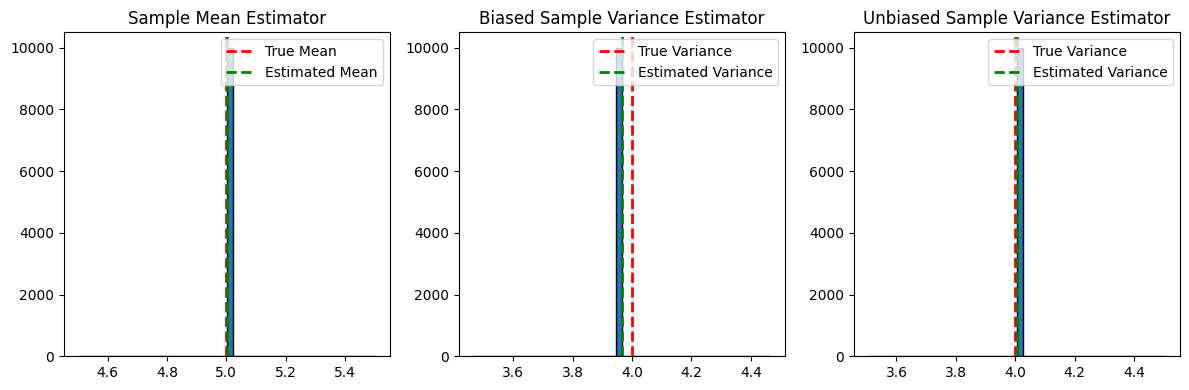

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sample_data(n_samples, true_mean, true_std):
    """Generate sample data from a normal distribution."""
    return np.random.normal(true_mean, true_std, n_samples)

def sample_mean_estimator(data):
    """Estimate the mean of the data."""
    return np.mean(data)

def sample_variance_estimator(data):
    """Estimate the variance of the data (biased estimator)."""
    return np.mean((data - np.mean(data))**2)

def unbiased_variance_estimator(data):
    """Estimate the variance of the data (unbiased estimator)."""
    return np.var(data, ddof=1)

def evaluate_bias(true_value, estimator_func, data, n_simulations):
    """Evaluate the bias of an estimator."""
    estimates = np.array([estimator_func(data) for _ in range(n_simulations)])
    bias = np.mean(estimates) - true_value
    return bias, estimates

# Set true parameters and simulation settings
true_mean = 5
true_variance = 4
true_std = np.sqrt(true_variance)
n_samples = 100
n_simulations = 10000

# Generate data
data = generate_sample_data(n_samples, true_mean, true_std)

# Evaluate bias for mean estimator
mean_bias, mean_estimates = evaluate_bias(true_mean, sample_mean_estimator, data, n_simulations)

# Evaluate bias for biased variance estimator
biased_var_bias, biased_var_estimates = evaluate_bias(true_variance, sample_variance_estimator, data, n_simulations)

# Evaluate bias for unbiased variance estimator
unbiased_var_bias, unbiased_var_estimates = evaluate_bias(true_variance, unbiased_variance_estimator, data, n_simulations)

# Print results
print(f"True Mean: {true_mean}")
print(f"Bias of Sample Mean Estimator: {mean_bias:.6f}")

print(f"\nTrue Variance: {true_variance}")
print(f"Bias of Biased Sample Variance Estimator: {biased_var_bias:.6f}")
print(f"Bias of Unbiased Sample Variance Estimator: {unbiased_var_bias:.6f}")

# Plotting
plt.figure(figsize=(12, 4))

# Mean estimator plot
plt.subplot(1, 3, 1)
plt.hist(mean_estimates, bins=50, edgecolor='black')
plt.axvline(true_mean, color='r', linestyle='dashed', linewidth=2, label='True Mean')
plt.axvline(np.mean(mean_estimates), color='g', linestyle='dashed', linewidth=2, label='Estimated Mean')
plt.title('Sample Mean Estimator')
plt.legend()

# Biased variance estimator plot
plt.subplot(1, 3, 2)
plt.hist(biased_var_estimates, bins=50, edgecolor='black')
plt.axvline(true_variance, color='r', linestyle='dashed', linewidth=2, label='True Variance')
plt.axvline(np.mean(biased_var_estimates), color='g', linestyle='dashed', linewidth=2, label='Estimated Variance')
plt.title('Biased Sample Variance Estimator')
plt.legend()

# Unbiased variance estimator plot
plt.subplot(1, 3, 3)
plt.hist(unbiased_var_estimates, bins=50, edgecolor='black')
plt.axvline(true_variance, color='r', linestyle='dashed', linewidth=2, label='True Variance')
plt.axvline(np.mean(unbiased_var_estimates), color='g', linestyle='dashed', linewidth=2, label='Estimated Variance')
plt.title('Unbiased Sample Variance Estimator')
plt.legend()

plt.tight_layout()
plt.show()

# Variance and Standard Error

**Variance** is another property of an estimator that we maight want to consider, which is how much we exepct it to vary as a function of the data sample.

The **variance** of an estimator is simply the variance:

$$
  Var(\hat{\theta})
$$

The square root of the variance is called the **standard error** $SE(\hat{\theta})$

The variance, or standard error, of an estimator proivides a measure of how we would expect the estimate we compute from data to vary as we independently resample the datasert from underlying data-generating process.

The standard error of the mean is given by

$$
  SE(\hat{\mu}) = \sqrt{Var[\frac{1}{m}} \sum_{i=1}^m x^{(i)}] = \frac{\sigma}{\sqrt{m}}
$$
where $\sigma^2$ is the true variance of the samples $x^i$.

## Example

We once again consider a set of samples drawn independently and identically from a Bernoulli distributio. This time we are interested in computing the varaince of thee etimator $\hat{\theta}_m = \frac{1}{m} \sum_{i+1}^m x^{(i)}$


$$
  Var(\hat{\theta}_m) = Var (\frac{1}{m} \sum_{i+1}^m x^{(i)}) \\
  = \frac{1}{m^2} \sum_{i+1}^m Var(x^{(i)}) \\
  = \frac{1}{m^2} \sum_{i+1}^m \theta(1 - \theta) \\
  = \frac{1}{m^2} m\theta(1 - \theta) \\
  = \frac{1}{m} \theta(1 - \theta)
$$

The variance of the estimator decreases as a function of $m$, the number of examples in the dataset. This is a cmmon property of popular estimators, related to consistency.

# Mean Squares Error

The **mean squared error** (MSE) measures the overall expected deviation - in a squared error sense - between the estimator and the true value of the parameters $\theta$. Evaluating the MSE incorporates both the bias  and the variance.

$$
  MSE = \mathbb{E}[(\hat{\theta}_m - \theta)^2] \\
  = Bias(\hat{\theta}_m)^2 + Var(\hat{\theta}_m)
$$

Desirable estimators are those with small MSE and these are estimators that manage to keep both their bias and variance somewhat in check. Increasing capaity tends to increase variance and decrease bias.

# Consistency

As the number of data points in $m$ in our dataset increases, our point estimates coverge to the true value of the corresponding parameters. This condition described below is referred to as **consistency**.


$$
  plim_{m \to \infty} \hat{\theta}_m = \theta
$$

Consistency ensures that the bias induced by the estimator diminishes as the number of data examples grow.

# Maximum Likelihhood Estimation

The maxmimum likelihood extimator for $\theta$ is defines as

$$
  \theta_{ML} = arg \texttt{ } max_{\theta} p_{model} (\mathbb{X}; \theta) \\
  = arg \texttt{ } max_{\theta} \prod_{i=1}^{m} p_{model} (x^{(i)}; \theta)
$$

The product over many probabilites can be inconvnenient for various reasons. For example, it is prone to numerical overflow. To obtain a more conveniant but equivalent optimization probel, we obsever that taking the logarithm of the likelhihood does not change its arg max but does conveniantly transfrom a product into a sum:

$$
  \theta_{ML} = arg \texttt{ } max_{\theta}\sum_{i=1}^m log p_{model} (x^{(i)}; \theta) \\
  \theta_{ML} = arg \texttt{ } max_{\theta} \mathbb{E}_{x \sim \hat{p}_{data}} log p_{model} (x^{(i)}; \theta) \\
$$

One way to interpret the maximum likelihood is to view it as minimizung the dissamimlarity between the empiercal distribution $\hat{p}_{data}$, defined by the training set and the model distribution $p_{model}$, with the degree of dissimiarlity between  the two measured by the KL divergence:

$$
  D_{KL} (p_{model} || \hat{p}_{data}) = \mathbb{E}_{x \sim \hat{p}_{data}} \log \hat{p}_{data}(x) - \log p_{model} (x)
$$

Ther term on the left is constant, and a function only of the data-gernating process, not the model. THat means we train the model to minimize the KL divergenece by minimizing the term on the right.

$$
  - \mathbb{E}[\log p_{model} (x)]
$$

Minimizing the KL divergence corresponds exactly to minimizing the cross-entropy between the distributions.

For example the mean squared error is the cross-entropy between the empiercal distribution and a Gaussian model. Whole the opptimal $\theta$ is the same

Whether we are maximizing the likelihood or minimizing the KL dviergence, the values of the objective functions are different.

In fotware, we often phrase both as minimizing a cost function. Maxmium likelihood thus becomes minimization of the **negative log-likelihood** (NLL).

In [18]:
import numpy as np
from scipy.optimize import minimize

def negative_log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(np.log(1/(sigma * np.sqrt(2*np.pi))) - ((data - mu)**2)/(2*sigma**2))

# Generate sample data
np.random.seed(42)
true_mu, true_sigma = 5, 2
data = np.random.normal(true_mu, true_sigma, 1000)

# Perform MLE
result = minimize(negative_log_likelihood, x0=[0, 1], args=(data,), method='Nelder-Mead')
estimated_mu, estimated_sigma = result.x

print(f"True: mu={true_mu}, sigma={true_sigma}")
print(f"MLE: mu={estimated_mu:.2f}, sigma={estimated_sigma:.2f}")

True: mu=5, sigma=2
MLE: mu=5.04, sigma=1.96


# Conditional Log-likelihood

The maximum likelihood estimator can readily be generalized to estimate a condiational probbaility $P(y|x;\theta)$, in order to predict $y$ given $x$.

This is actually the most common situation because it forms the basis for most supvervised learning.

The condtional maximal likelihood estimator is

$$
  \theta_{ML} = arg \texttt{ } max P(Y|X;\theta)
$$

If the examples are assumed to be identical and independently distibuted (i.i.d.) then it becomes

$$
  \theta_{ML} = arg \texttt{ } max \sum_{i=1}^m \log P(y^{(i)}|x^{(i)};\theta)
$$

# Example: Linear Regression as Maxmium Likelihodd

The conditional log likelihood is given by

$$
  \sum_{i=1}^m \log p(y^{(i)} | x^{(i)}; \theta)
  = -m \log \sigma - \frac{m}{2} \log (2 \pi) - \sum_{i=1}^{m} \frac{||\hat{y}^{(i)} - y^{(i)}||^2}{2\sigma^2}
$$

Comparing log-likelihood  with mean square error

$$
  MSE_{train} = \frac{1}{m} \sum_{i=1}^m ||\hat{y}^{(i)} - y^{(i)}||^2
$$

## Consistency and Efficiency

No consistent estimator has a lower MSE thatn the maximum likelihood estimator.

**Consistency** - performance improves, the estimator $p_{model}$ converges to the true value of $p_{data}$

**Efficiency** - quick convergence in training.

The maximum likelihood estimator is known for its consistency and efficiency.